<a href="https://colab.research.google.com/github/GreggHeller1/replace_with_env_name/blob/main/scripts/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#settings
%load_ext autoreload
%autoreload 2
try:
  import google.colab
  in_colab = True
except:
  in_colab = False
print(in_colab)

False


In [2]:
#installs (for colab only, run this once)
if in_colab:
    ! git clone https://github.com/GreggHeller1/replace_with_env_name.git

In [3]:
#local imports
#cwd if in colab for imports to work
if in_colab:
    %cd /content/replace_with_env_name
    
from src import data_io as io
from src import plotting as plot
from src import computation as comp
from src import helper_functions as hf

In [4]:
#imports
import xarray as xr
#import pandas as pd
import numpy as np
import ipdb


from matplotlib import pyplot as plt

from PIL import Image #this needs to be after matplotlib??
from scipy.stats import stats   


import os
#from neuron import h, gui

In [6]:
#define paths
#cwd if in colab for file loading to work
if in_colab:
    %cd /content/replace_with_env_name/scripts
    
test_path = os.path.join('demo_data', 'test.txt')
print(test_path)
print(os.getcwd())
print(os.path.exists(test_path))


soma_path = "/Users/Gregg/code/replace_with_env_name/scripts/demo_data/ASC26_cell_3_soma.mat"
spines_path = "/Users/Gregg/code/replace_with_env_name/scripts/demo_data/ASC26_cell_3_spines.mat"
spines_path = "/Users/Gregg/Dropbox (MIT)/2021 Gregg Sur rotation/ASC_experimental_data/2022-11 Soma Data/ASC15.mat"
print(os.path.exists(soma_path))
print(os.path.exists(spines_path))

demo_data/test.txt
/Users/Gregg/code/replace_with_env_name/scripts
True
True
True


In [7]:
#data inputs
#io.readfile(test_path)
soma = io.loadmat(soma_path)
spine_data = io.loadmat(spines_path)
soma_data = soma

In [15]:
#data manipulation
spines = spine_data
type(spines)
print(spines[0].shape)


print(soma[3])
print(spines['dend_cell'])

#print(np.shape(soma['soma_cell']))
#print(np.shape(spines['dend_cell']))



#print(soma['soma_cell'][0,3]._fieldnames)


AttributeError: 'mat_struct' object has no attribute 'shape'

In [20]:
#print(spines.keys())
#print(np.shape(soma[3]))
#print(soma[3].keys())


soma_field_2 = io._todict(soma[2])

spine_field_2 = io._todict(soma[2])
#ref = spine_field_2['dend_cell'][2,0]
#spine_field_2 = spines[ref]#['DSI']

#print(np.array(field_2))
#print(field_2['vis_stim_times'])

#spines_f2 = 


KeyError: 'dend_cell'

In [21]:
print(spine_field_2['trial_traces'].shape)

(16, 10, 91)


In [10]:
soma_traces = np.array(soma_field_2['trial_traces'])
spine_traces = np.array(spine_field_2['trial_traces'][:,:,0,:,0].swapaxes(0,-1))

fovs = spine_data['dend_cell'][2,:].shape[0]
print(fovs)

print(soma_traces.shape)
print(spine_traces.shape)


#trial_amps = np.array(field_2['trial_amp'])
#print(trial_amps.shape)

11
(16, 10, 91)
(16, 10, 91)


In [36]:
soma_traces = hf.get_traces(soma_data)
spine_traces = hf.get_traces(spine_data)

In [37]:
metadata = hf.get_spine_metadata(spine_data, fov_num = 0)
print(len(hf.get_neck_length(spine_data)['stem_stats']))

1


In [38]:
soma_sub_traces = comp.select_timesteps(soma_traces)

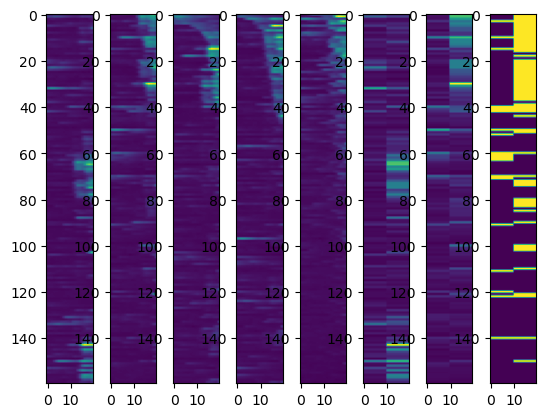

In [39]:
plot.plot_activity_plots(soma_sub_traces)

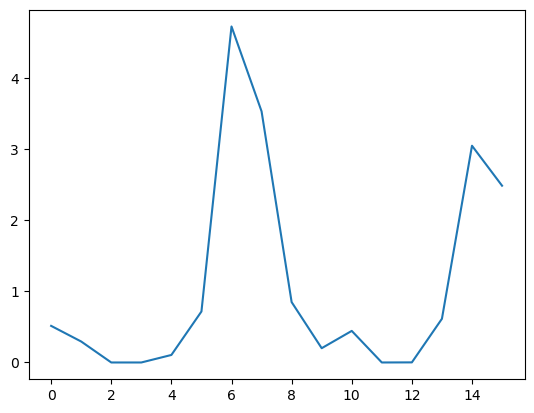

In [40]:
plt.plot(hf.get_precomputed_tuning_curve(soma_data))

In [48]:
summed_spine_traces_1 = comp.get_summed_trial_sampled_spine_trace(spine_data)
sum_spine_sub_traces = comp.select_timesteps(summed_spine_traces_1)

AttributeError: module 'src.computation' has no attribute 'get_summed_trial_sampled_spine_trace'

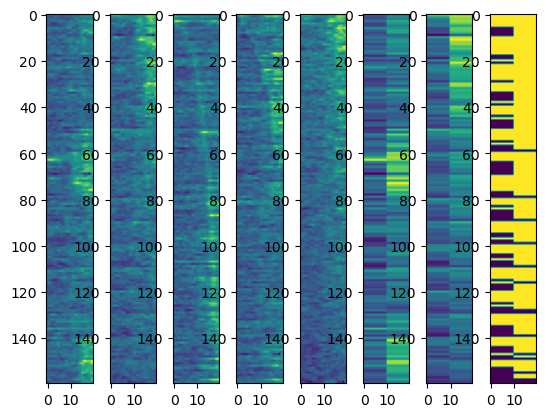

In [42]:
plot.plot_activity_plots(sum_spine_sub_traces)

In [43]:
import cProfile
cProfile.run('summed_spine_traces = comp.get_summed_trial_sampled_spine_trace(spine_data)')

#summed_spine_traces = comp.get_summed_trial_sampled_spine_trace(spine_data)
sum_spine_sub_traces = comp.select_timesteps(summed_spine_traces)

         3 function calls in 0.000 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}




AttributeError: module 'src.computation' has no attribute 'get_summed_trial_sampled_spine_trace'

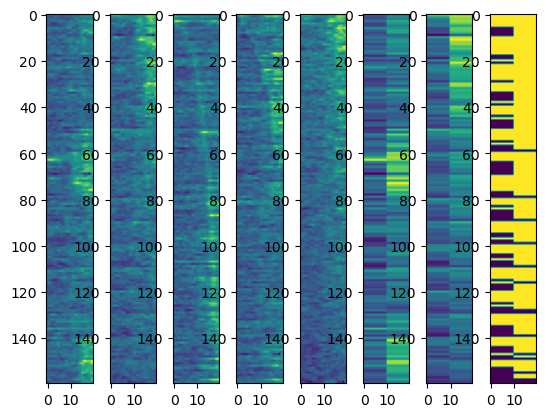

In [45]:
plot.plot_activity_plots(sum_spine_sub_traces)

(16,)


NameError: name 'summed_spine_traces' is not defined

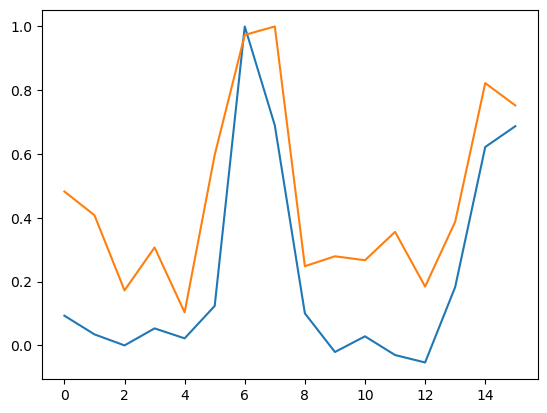

In [55]:
means = comp.compute_tuning_curve(soma_traces)
print(means.shape)
soma_means = means/max(means)
plt.plot(soma_means, label='measured soma response')
means = comp.compute_tuning_curve(summed_spine_traces_1)
means = means/max(means)

plt.plot(means, label='sum spines')
means = comp.compute_tuning_curve(summed_spine_traces)
sampled_means = means/max(means)

plt.plot(sampled_means, label='sum sampled spines')

plt.plot(hf.get_precomputed_tuning_curve(soma_data), label='kyles')
plt.legend()
print(f'{stats.pearsonr(soma_means, sampled_means)}')

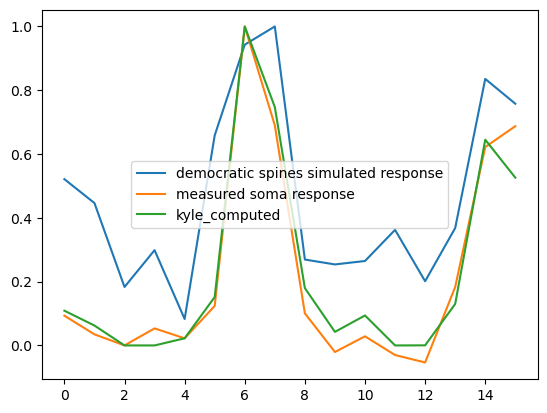

In [138]:
all_spine_activity_array, spines_per_fov_list = comp.compile_spine_traces(spine_data)

model_output = comp.compute_model_output_from_random_sampled_fovs(spine_data, all_spine_activity_array, spines_per_fov_list, simulated_trials_per_stim=100)
means = comp.compute_tuning_curve(model_output)
means = means/max(means)
plt.plot(means, label='democratic spines simulated response')
plt.plot(soma_means, label='measured soma response')




kyle_means = hf.get_precomputed_tuning_curve(soma_data)
#mean_amp should be mean of all the trials
#excluded trials where the baseline was elevated
#trial amps is mean of stim on - mean o baseline, then average
#stim on is 41-50 (0-.9)
#baseline is 21-40 (-2:-.1)

#also median and von mieses



kyle_means = kyle_means/max(kyle_means)
plt.plot(kyle_means, label = 'kyle_computed')

plt.legend()


In [ ]:
#plot.plot_activity_plots(np.array(model_output))
plt.imshow(plot.flatten_for_image(np.array(model_output)), aspect='auto')

In [ ]:
plt.imshow(plot.flatten_for_image(soma_traces), aspect='auto')

In [ ]:

weighted_traces = comp.weights_size_lin(spine_data, all_spine_activity_array)


weighted_traces.shape

spine = 1
stim = 6
pres = 0
plt.plot(weighted_traces[spine,stim,pres,:])
plt.plot(all_spine_activity_array[spine,stim,pres,:])


In [226]:

all_spine_activity_array, spines_per_fov_list = comp.compile_spine_traces(spine_data, subset='unresponsive')

unresponsive_model_output = comp.compute_model_output_from_random_sampled_fovs(spine_data,
    all_spine_activity_array, spines_per_fov_list, simulated_trials_per_stim=100,
)
unresponsive_means = comp.compute_tuning_curve(unresponsive_model_output)
unresponsive_means = unresponsive_means/max(unresponsive_means)

all_spine_activity_array, spines_per_fov_list = comp.compile_spine_traces(spine_data, subset='responsive')


responsive_model_output = comp.compute_model_output_from_random_sampled_fovs(spine_data,
    all_spine_activity_array, spines_per_fov_list, simulated_trials_per_stim=100,
)
responsive_means = comp.compute_tuning_curve(responsive_model_output)
responsive_means = responsive_means/max(responsive_means)


[ 0  1  2  3  8  9 12]
[ 0  1  3  6  9 10]
[ 2  3  4  5  8 10 14 15 16]
[ 0  1  2  3  4  5  6  7  9 10]
[0 2 3 5]
[ 0  1  3  5  6  8  9 11 12]
[ 0  1  2  4  5  7  8 11 12 13 14]
[ 0  1  2  3  4  5  8 11]
[0 1 2 3 4 5 6 7]
[ 3  5  6 11 12]
[1 2 3 4 5]
####
[ 4  5  6  7 10 11 13]
[ 2  4  5  7  8 11]
[ 0  1  6  7  9 11 12 13]
[ 8 11]
[1 4 6 7 8]
[ 2  4  7 10]
[ 3  6  9 10 15]
[ 6  7  9 10 12]
[8 9]
[ 0  1  2  4  7  8  9 10 13]
[0]
####


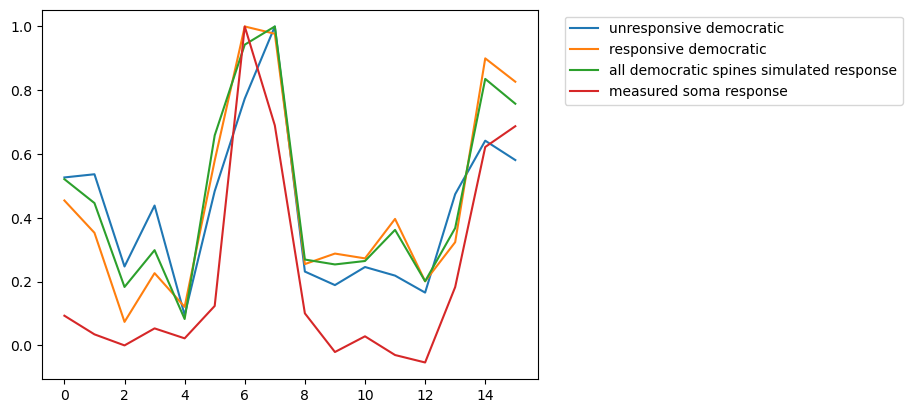

In [227]:

plt.plot(unresponsive_means, label='unresponsive democratic')

plt.plot(responsive_means, label='responsive democratic')

plt.plot(means, label='all democratic spines simulated response')
plt.plot(soma_means, label='measured soma response')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")

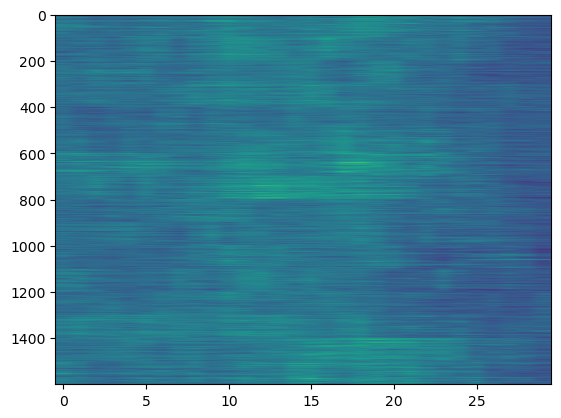

In [229]:
selected_timesteps = comp.select_timesteps(np.array(unresponsive_model_output))
new_idx = plot.sort_by_onset_time(selected_timesteps)#, plot.sort_by_mean_amp)
ordered_traces = plot.use_as_index(new_idx, selected_timesteps)

#plt.imshow(ordered_traces, aspect='auto')
plt.imshow(plot.flatten_for_image(selected_timesteps), aspect='auto')

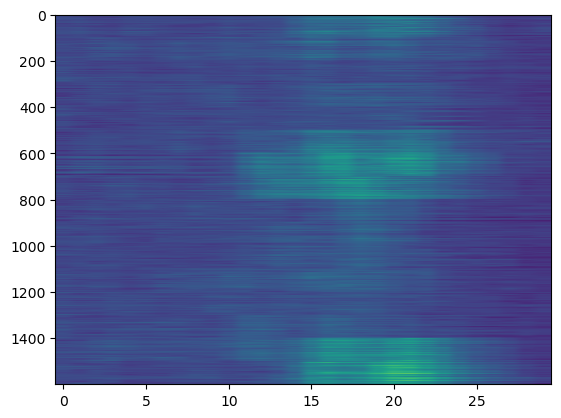

In [230]:
selected_timesteps = comp.select_timesteps(np.array(responsive_model_output))
new_idx = plot.sort_by_onset_time(selected_timesteps)#, plot.sort_by_mean_amp)
ordered_traces = plot.use_as_index(new_idx, selected_timesteps)

#plt.imshow(ordered_traces, aspect='auto')
plt.imshow(plot.flatten_for_image(selected_timesteps), aspect='auto')

In [ ]:
all_spine_activity_array, spines_per_fov_list = comp.compile_spine_traces(spine_data)

size_model_output = comp.compute_model_output_from_random_sampled_fovs(spine_data,
    all_spine_activity_array, spines_per_fov_list, simulated_trials_per_stim=100,
    weight_function = comp.weights_size_lin
)
size_means = comp.compute_tuning_curve(size_model_output)
size_means = size_means/max(size_means)

dist_model_output = comp.compute_model_output_from_random_sampled_fovs(spine_data,
    all_spine_activity_array, spines_per_fov_list, simulated_trials_per_stim=100,
    weight_function = comp.weights_distance_lin
)
dist_means = comp.compute_tuning_curve(dist_model_output)
dist_means = dist_means/max(dist_means)

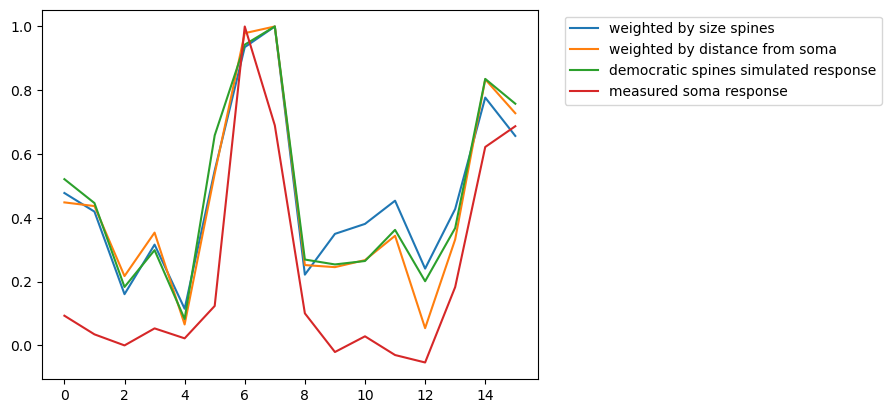

In [140]:

    
plt.plot(size_means, label='weighted by size spines')

plt.plot(dist_means, label='weighted by distance from soma')

plt.plot(democratic_means, label='democratic spines simulated response')
plt.plot(soma_means, label='measured soma response')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")

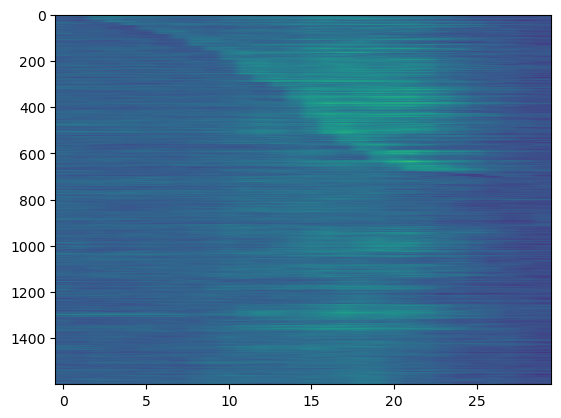

In [234]:
selected_timesteps = comp.select_timesteps(np.array(size_model_output))
new_idx = plot.sort_by_onset_time(selected_timesteps)#, plot.sort_by_mean_amp)
ordered_traces = plot.use_as_index(new_idx, selected_timesteps)

plt.imshow(ordered_traces, aspect='auto')
#plt.imshow(plot.flatten_for_image(selected_timesteps), aspect='auto')

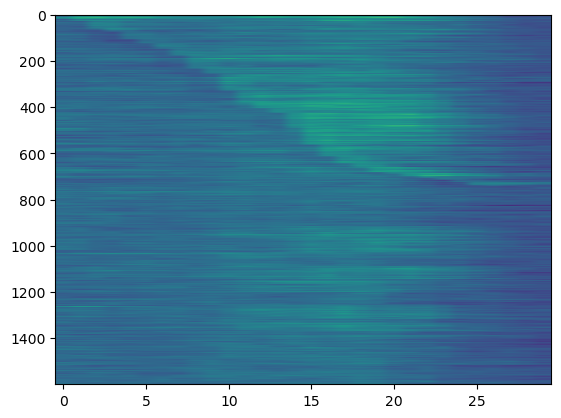

In [103]:
selected_timesteps = comp.select_timesteps(np.array(dist_model_output))
new_idx = plot.sort_by_onset_time(selected_timesteps)#, plot.sort_by_mean_amp)
ordered_traces = plot.use_as_index(new_idx, selected_timesteps)

plt.imshow(ordered_traces, aspect='auto')
#plt.imshow(plot.flatten_for_image(selected_timesteps), aspect='auto')

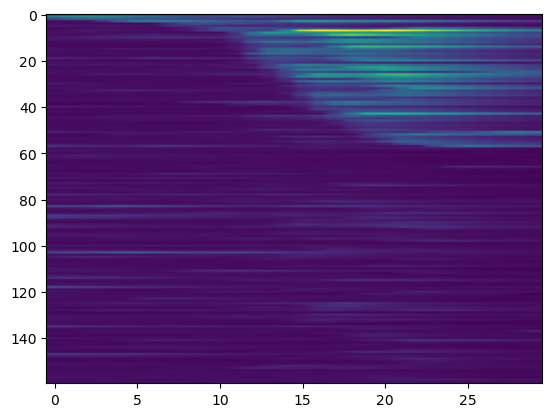

In [122]:
selected_timesteps = comp.select_timesteps(soma_traces)
new_idx = plot.sort_by_onset_time(selected_timesteps)#, plot.sort_by_mean_amp)
ordered_traces = plot.use_as_index(new_idx, selected_timesteps)

plt.imshow(ordered_traces, aspect='auto')
#plt.imshow(plot.flatten_for_image(selected_timesteps), aspect='auto')

In [166]:
a = np.zeros((136, 16, 10, 91))
print(a.shape)
b = np.arange(0, a.shape[0], 1)
print(len(b))
c = np.random.randint(0,9, len(b))
print(c)
#lets try to grab the 1st presentation for spine 1 and the second for spine 2
sliced = a[b, :, c, :]
print(sliced.shape)

(136, 16, 10, 91)
136
[0 7 2 5 5 5 4 0 0 3 6 1 8 1 4 3 8 4 7 7 2 7 1 5 1 1 7 4 4 7 1 5 2 2 8 5 8
 5 3 0 1 4 6 8 4 1 3 7 6 7 4 4 6 7 3 1 2 5 8 0 1 4 3 8 1 8 4 0 2 8 0 2 8 0
 0 5 6 0 5 5 2 3 3 1 5 8 4 1 5 0 6 5 3 0 4 1 7 8 0 4 4 1 2 7 0 3 8 8 8 1 7
 0 2 8 5 6 7 8 1 3 7 6 7 1 7 4 7 0 3 7 4 4 2 4 6 3]
(136, 16, 91)


In [61]:
a = np.array([[1,2,3,4,5,6], [7,8,9,10,11,12]])
print(a.shape)
a[(1,0,1,0,1,0), (0,1,2,3,4,5)]

(2, 6)


array([ 7,  2,  9,  4, 11,  6])

In [19]:
spine_sub_traces = comp.select_timesteps(spine_traces)
print(spine_traces.shape)
print(spine_sub_traces.shape)

(16, 10, 91)
(16, 10, 20)


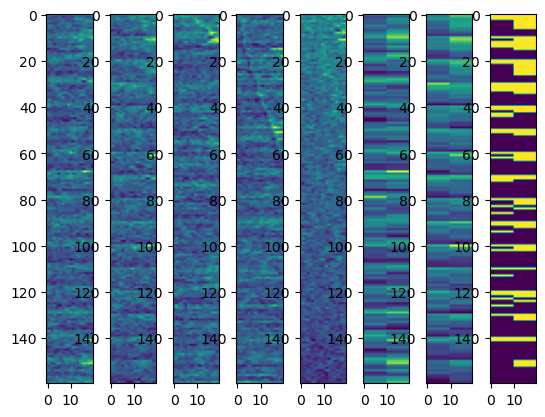

In [20]:
plot.plot_activity_plots(spine_sub_traces)

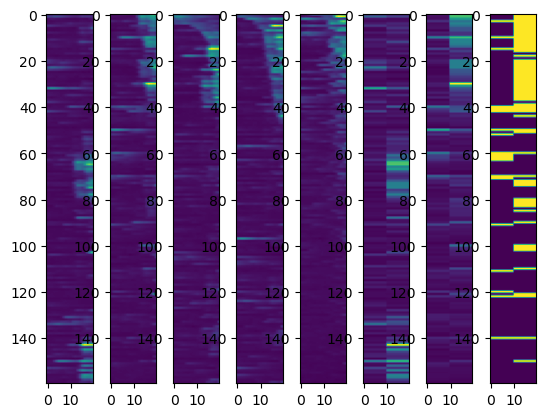

In [21]:
plot.plot_activity_plots(soma_sub_traces)

In [232]:
all_spine_activity_array, spines_per_fov_list = comp.compile_spine_traces(spine_data, subset='all')

zeta_list = []
for i, (fov_activity_meta, fov_metadata )in enumerate(hf.fov_generator(spine_data)):
    zeta_list.extend(list(hf.get_fov_zetas(fov_activity_meta)))

similarity_list, spine_num_list = plot.get_most_similar_spine(soma_data, all_spine_activity_array)
#spine_means, spine_means_sorted, spine_bool = plot.produce_activity_plots(best_match_traces)  
responsive_idxs = list(np.where(np.array(zeta_list) <=.05)[0])
responsive_ranks = []
for i, spine_idx in enumerate(spine_num_list):
    if spine_idx in responsive_idxs:
        responsive_ranks.append(i)
print(responsive_ranks)

unresponsive_idxs = list(np.where(np.array(zeta_list) >.05)[0])
unresponsive_ranks = []
for i, spine_idx in enumerate(spine_num_list):
    if spine_idx in unresponsive_idxs:
        unresponsive_ranks.append(i)
print(unresponsive_ranks)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]
[ 0  1  2  3  4  5  6  7  8  9 10 11]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
[ 0  1  2  3  4  5  6  7  8  9 10 11]
[0 1 2 3 4 5 6 7 8]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12]
[0 1 2 3 4 5 6 7 8 9]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]
[0 1 2 3 4 5]
####
[0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 12, 13, 14, 16, 18, 21, 23, 26, 28, 31, 32, 33, 36, 37, 39, 40, 42, 47, 50, 62, 73, 74, 80, 83, 84, 85, 86, 87, 94, 95, 97, 101, 103, 111, 113, 115, 120, 122, 126, 129, 132, 134, 135]
[6, 11, 15, 17, 19, 20, 22, 24, 25, 27, 29, 30, 34, 35, 38, 41, 43, 44, 45, 46, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 75, 76, 77, 78, 79, 81, 82, 88, 89, 90, 91, 92, 93, 96, 98, 99, 100, 102, 104, 105, 106, 107, 108, 109, 110, 112, 114, 116, 117, 118, 119, 121, 123, 124, 125, 127, 128, 130, 131, 133]


global spine_num: 19, this is the 5th spine in fov 1
global spine_num: 101, this is the 8th spine in fov 7
global spine_num: 47, this is the 4th spine in fov 3
global spine_num: 17, this is the 3th spine in fov 1
global spine_num: 0, this is the 0th spine in fov 0
global spine_num: 8, this is the 8th spine in fov 0
global spine_num: 45, this is the 2th spine in fov 3
global spine_num: 97, this is the 4th spine in fov 7
global spine_num: 41, this is the 15th spine in fov 2
global spine_num: 132, this is the 2th spine in fov 10


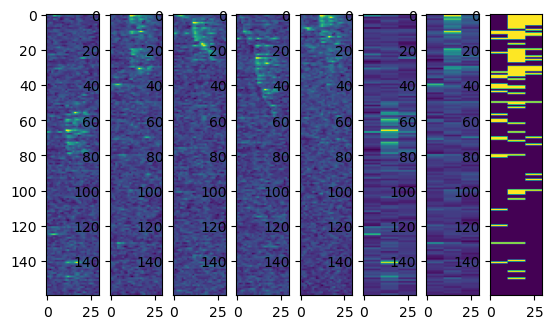

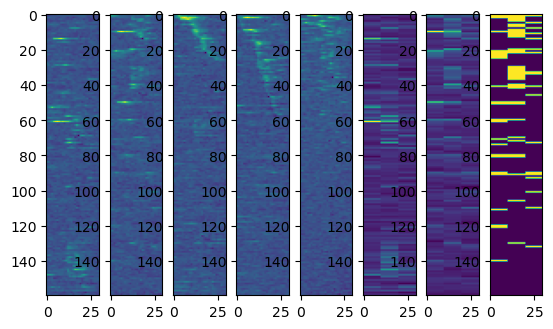

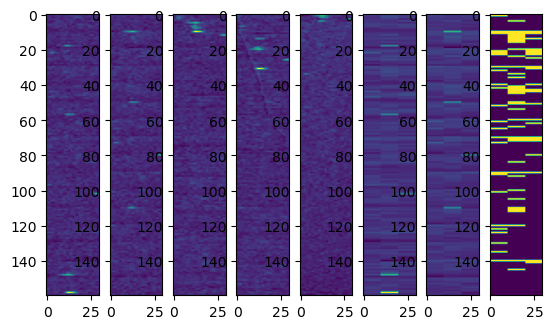

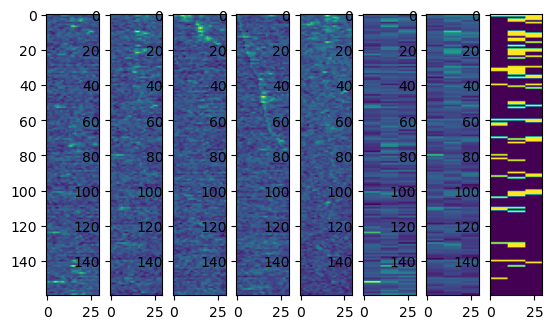

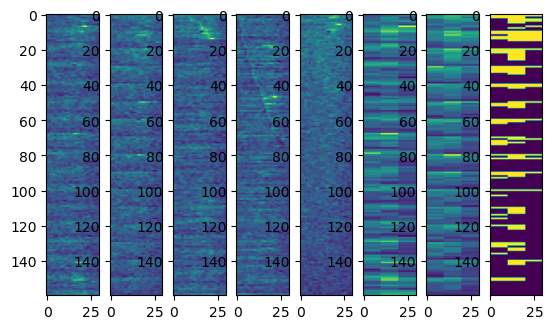

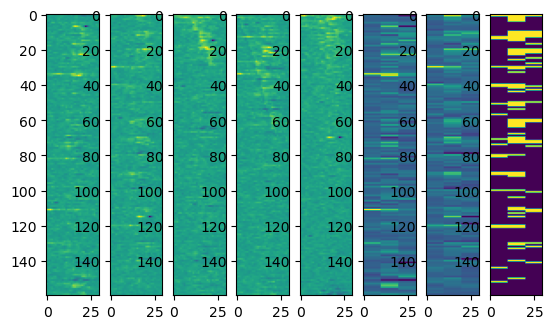

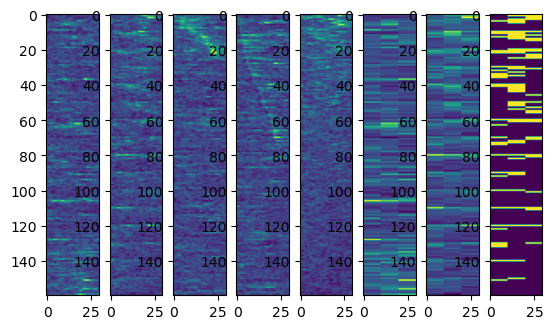

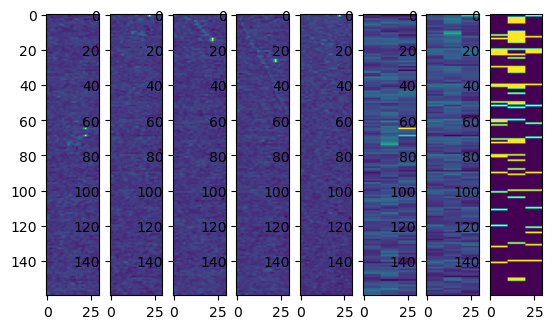

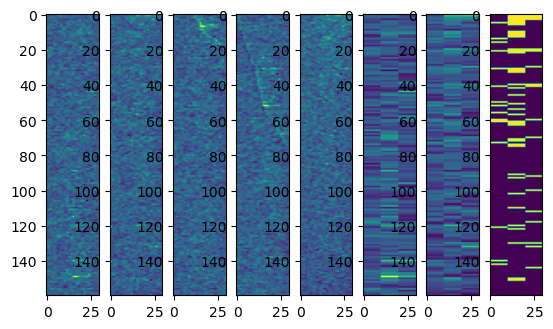

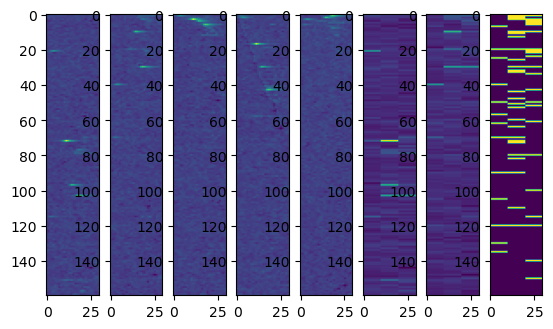

In [233]:
#for rank in range(10):
for rank in unresponsive_ranks[:10]:
#for rank in responsive_ranks[:10]:
    #best_match_traces = comp.get_traces(spine_data, fov=fov_num_list[rank], spine_index=spine_num_list[rank])
    best_match_traces = comp.select_timesteps(all_spine_activity_array[spine_num_list[rank],:,:,:])
    global_spine_num = spine_num_list[rank]
    (fov_i, spine_fov_i) = hf.get_fov_idx_from_all_spine_idx(global_spine_num, spine_data)
    print(f'global spine_num: {global_spine_num}, this is the {spine_fov_i}th spine in fov {fov_i}')
    plot.plot_activity_plots(np.array(best_match_traces))

In [ ]:
stim_repeats = 10


np.random.randint(0,stim_repeats, (3,4,5))

In [ ]:
fov = 0
type(fov) is int

In [31]:
a = np.array([0,0,2,0,0,0,1,0,0,0,0,0,0,3,0,0])

In [32]:
np.roll(a, -(np.argmax(a)-7))

array([1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 2, 0, 0, 0])

In [33]:
-4%16

12

In [43]:
import matplotlib.colors as cm

In [46]:
num_cells = 20
responsive_colors = [ plt.get_cmap('autumn')(x) for x in np.linspace(0, 1, num_cells)]
unresponsive_colors = [ plt.get_cmap('winter')(x) for x in np.linspace(0, 1, num_cells)]
#From here https://stackoverflow.com/questions/8931268/using-colormaps-to-set-color-of-line-in-matplotlib 

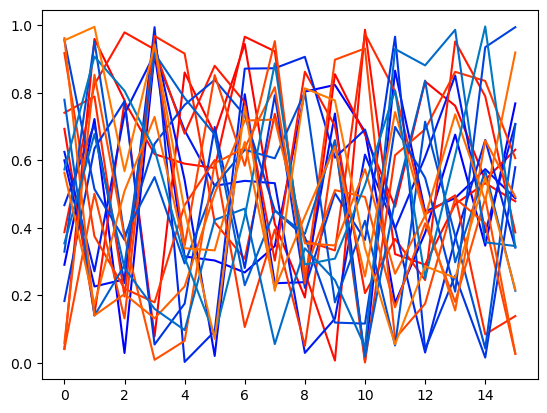

In [47]:
responsive_count = 0
unresponsive_count = 0
for i in range(num_cells):
    data = np.random.random(16)
    if i%2:
        color_val = responsive_colors[responsive_count]
        responsive_count+=1
    else:
        color_val = unresponsive_colors[unresponsive_count]
        unresponsive_count+=1
    plt.plot(data, color=color_val)

In [54]:
soma_field_2 = io._todict(soma_data[2])
tuning_curve = hf.get_precomputed_tuning_curve(soma_data)
preferred_stim_index = np.argmax(tuning_curve)
zeta_results = soma_field_2['ZETA_test_dir'][preferred_stim_index]
p_value = io._todict(zeta_results)['dblP']

In [55]:
print(p_value)

0.0012209905874881466


In [151]:
from scipy import stats
from PIL import Image
import imageio

/Users/Gregg/code/replace_with_env_name/src/config.py:51: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert((end_s-start_s)%seconds_per_bin==0, 'The time range must be evenly divisible by the bin size')


In [61]:
stats.pearsonr([1,2,3], [4,5,6])


PearsonRResult(statistic=0.9999999999999998, pvalue=1.3415758552508151e-08)

In [166]:
test_array = np.random.randint(0,200,(16,16))
test_array = np.random.rand(16,16)#*30
data = test_array
path = 'demo_data/my_image.tiff'
img1 = Image.fromarray(data)
img1.save(path)
test_read = np.array(Image.open(path))

#f1 = list(img1.getdata())
#f2 = list(img2.getdata())
#print(f1 == f2)
#print(f1)

#test_array = np.tile(test_array,(3,1,1))
#test_array = np.moveaxis(test_array,0, 2)
#print(test_array.shape)
#im_pil = Image.fromarray(test_array)
##from here https://stackoverflow.com/questions/71272571/cant-recover-the-same-numpy-array-from-pil-saved-png-image
#path = 'demo_data/my_image.Tiff'
#im_pil.save(f, 'TIFF')
#plt.imsave(path, test_array, cmap=plt.cm.gray)

In [167]:
with Image.open(path) as im:
        test_read = np.array(im)
test_read.shape

(16, 16)

In [168]:
test_read[0,:]

array([ 2.1552205,  5.1438   ,  3.8143601, 18.655315 , 16.115036 ,
       10.827108 , 27.535976 ,  6.524315 , 17.183922 ,  6.253901 ,
       15.734637 , 19.458038 , 14.564917 , 10.392739 ,  0.4683412,
       11.050704 ], dtype=float32)

In [169]:
test_array[0,:]

array([ 2.15522059,  5.14379987,  3.81436011, 18.65531625, 16.11503582,
       10.82710822, 27.53597722,  6.52431511, 17.18392107,  6.25390081,
       15.73463764, 19.45803839, 14.56491649, 10.39273956,  0.46834119,
       11.05070358])

In [7]:
import pandas as pd
import seaborn as sns


In [10]:
fullpath = "/Users/Gregg/Dropbox (MIT)/2021 Gregg Sur rotation/ASC_experimental_data/adult_spine_model_results/single_neuron_simulation_scores.csv"
df = pd.read_csv(fullpath, index_col=0)
df.head()

,experiment_id,model_type,model_correlation_to_soma_r,model_correlation_to_soma_p,model_soma_similarity_score,responsive_status
0,ASC18 cell 2,democratic,-0.003663,0.989259,0.127735,unresponsive
1,ASC18 cell 2,spine_size,0.014303,0.958073,0.144695,unresponsive
2,ASC18 cell 2,distance_to_soma,-0.026346,0.922845,0.129383,unresponsive
3,ASC18 cell 2,unresponsive,0.002488,0.992704,0.131316,unresponsive
4,ASC18 cell 2,responsive,-0.265595,0.320120,0.130932,unresponsive


In [12]:
data = {'group': [1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2],
        'block': [1, 1, 2, 2, 3, 3, 1, 1, 2, 2, 3, 3],
        'cond': ['c1', 'c2', 'c1', 'c2', 'c1', 'c2', 'c1', 'c2', 'c1', 'c2', 'c1', 'c2'],
        'value': [1, 2, 1.2, 2.1, 1.1, 2.2, 3, 4, 3.3, 4.1, 3.1, 4]}
df_2=pd.DataFrame(data)
df_2.head()

,group,block,cond,value
0,1,1,c1,1.0
1,1,1,c2,2.0
2,1,2,c1,1.2
3,1,2,c2,2.1
4,1,3,c1,1.1


In [ ]:
sns.lineplot(data=df.loc[df['unrespons'] == 1], x='block', y='value', hue='cond',
             palette='Blues', marker='o')
sns.lineplot(data=df.loc[df['group'] == 2], x='block', y='value', hue='cond',
             palette='Reds', marker='o')

## Get the legend handles and add them to plt.legend, so that the right handles are addigned
legend_handles, _= plt.gca().get_legend_handles_labels()
plt.legend(handles = legend_handles, title='Legend', loc='right',
           labels=['Group 1: C1', 'Group 1: C2', 'Group 2: C1', 'Group 2: C2'])
plt.show()